# Volume 3: K-Means Clustering.
    <Name> Dallin Stewart
    <Class> ACME 002
    <Date> Ah, the outdoors. I visited that mythical place once.

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as KM
%matplotlib inline

In [8]:
plt.rcParams["figure.dpi"] = 150

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$-th entry indicates which cluster center the $i$-th row of $X$ is closest to.

4. `plot()`: Accept an $l \times n$ matrix $X$ of $l$ data points and an array $y$ of $l$ integers representing the labels.
Plot each data point from the matrix, colored by cluster, along with the cluster centers.
Note that in this case, $n = 2$.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster.

In [67]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
        """
        # set attributes
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.normalize = normalize        # This is for Problem 3.
        self.p = p
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        # set local variables for the number of samples and number of features
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centers = X[initial_indices, :]

        for i in range(self.max_iter):
            # Assign each data point to the cluster center that is closest
            distances = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=-1, ord=self.p)
            closest_clusters = np.argmin(distances, axis=1)

            # Update the cluster centers
            update_centers = np.array([X[closest_clusters == k].mean(axis=0) for k in range(self.n_clusters)])

            # Normalize the cluster centers
            if self.normalize:
                update_centers = update_centers / np.linalg.norm(update_centers, axis=1, keepdims=True)

            # Check for convergence
            if np.linalg.norm(update_centers - centers) < self.tol:
                # update attributes
                self.centers = centers
                self.max_dist = np.max(np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=-1, ord=1))
                break

            # update centers
            centers = update_centers
        
        # update final attributes
        self.centers = centers
        self.max_dist = np.max(np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=-1, ord=1))
        return self
    
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters for each entry of X.
        """
        # Assign each data point to the cluster center that is closest and return
        return np.argmin(np.linalg.norm(X[:, None, :] - self.centers[None, :, :], axis=-1, ord=self.p), axis=1)


    def fit_predict(self, X):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        # fit the data and return the resulting labels
        return self.fit(X).predict(X)
    

    def plot(self, X, y, flip=False, title='K-means Clustering', xlabel='Feature 1', ylabel='Feature 2'):
        """Plot each of the data points, colored by cluster.
        Plot each of the cluster centers using a different marker.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data being clustered.
            y ((n_samples) ndarray): the labels for each of the samples.
        """
        hor = 0
        ver = 1
        if flip:
            hor = 1
            ver = 0
        # create scatter plot
        plt.scatter(X[:, hor], X[:, ver], c=y, cmap='tab20b')
        plt.scatter(self.centers[:, hor], self.centers[:, ver], marker='x', c='k')

        # set plot parameters
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

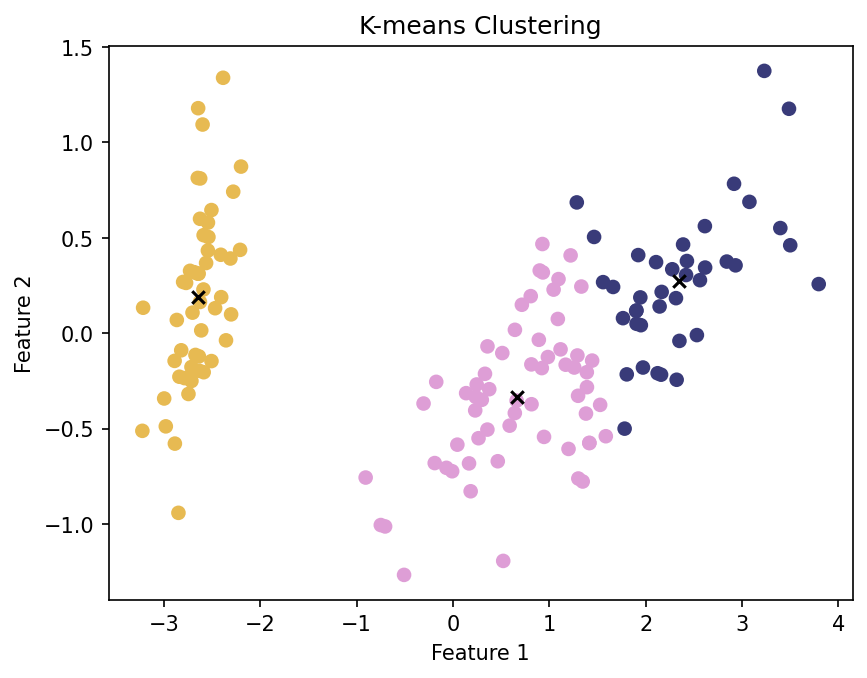

In [69]:
# load iris data
iris = load_iris()
iris_data = PCA(n_components = 2).fit_transform(iris.data)

# test Kmeans implementation
IRIS = KMeans(n_clusters = 3)
target = IRIS.fit_predict(iris_data)
IRIS.plot(iris_data, target)

## Problem 2
Using the Methods you wrote in Problem 1, add a parameter, $p$, to your class that denotes the norm and defaults to 2.
Save p as an attribute to be used in your fit() and predict() functions.
Using the latitude and longitude data in $\text{sacramento.npy}$ find the optimal placement for 12 fire stations. 
Plot the longitude and latitudes, the centers, and color them by cluster.
Make plots for different values for $p$ to find the optimal locations for the fire stations.
In a Markdown cell report which norm was the best at keeping the maximum distance small.

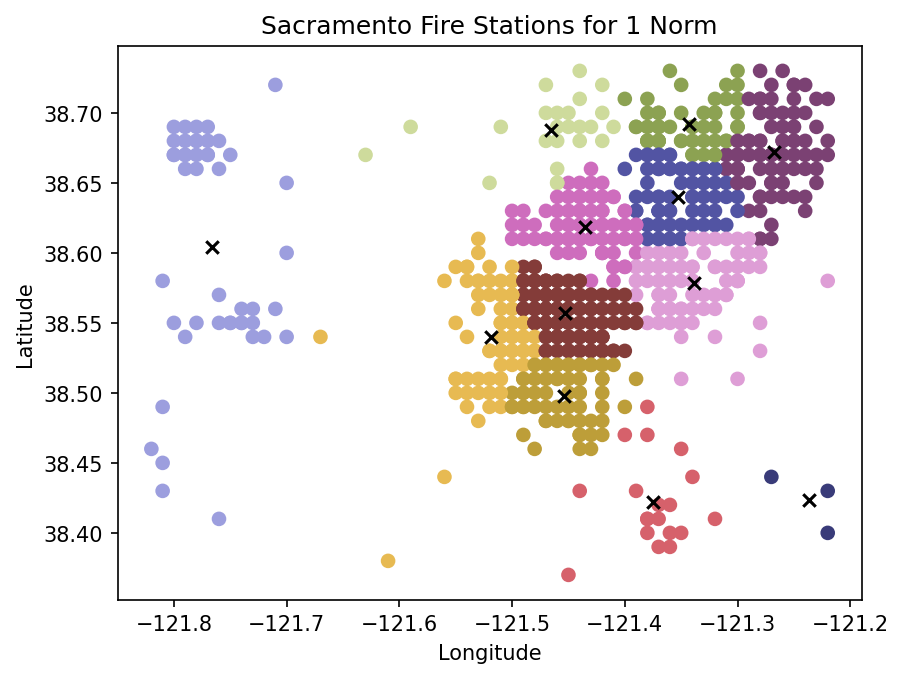

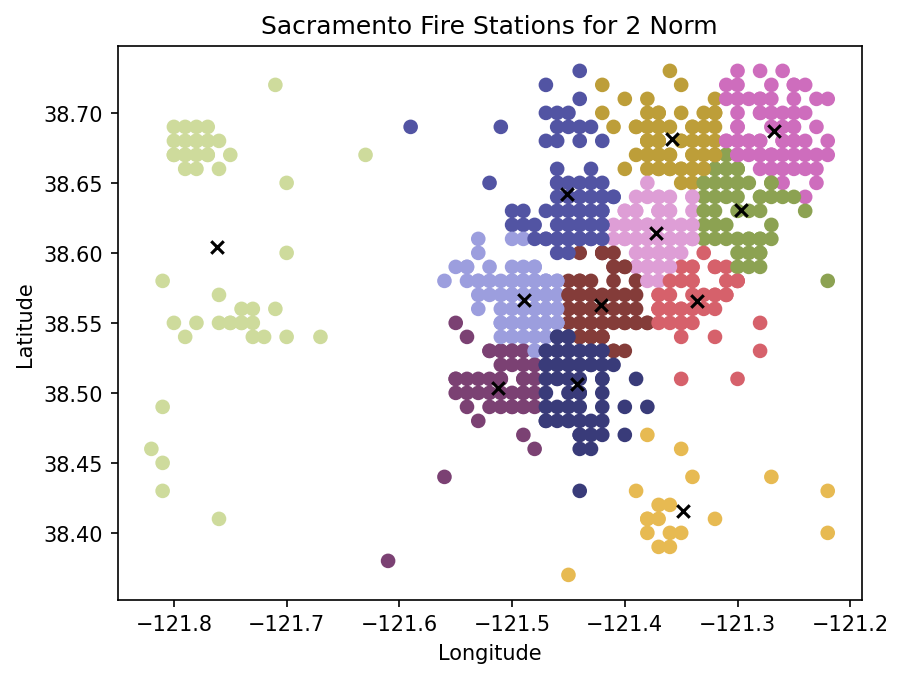

/tmp/ipykernel_228/1614961499.py:33: RuntimeWarning: Mean of empty slice.
  update_centers = np.array([X[closest_clusters == k].mean(axis=0) for k in range(self.n_clusters)])


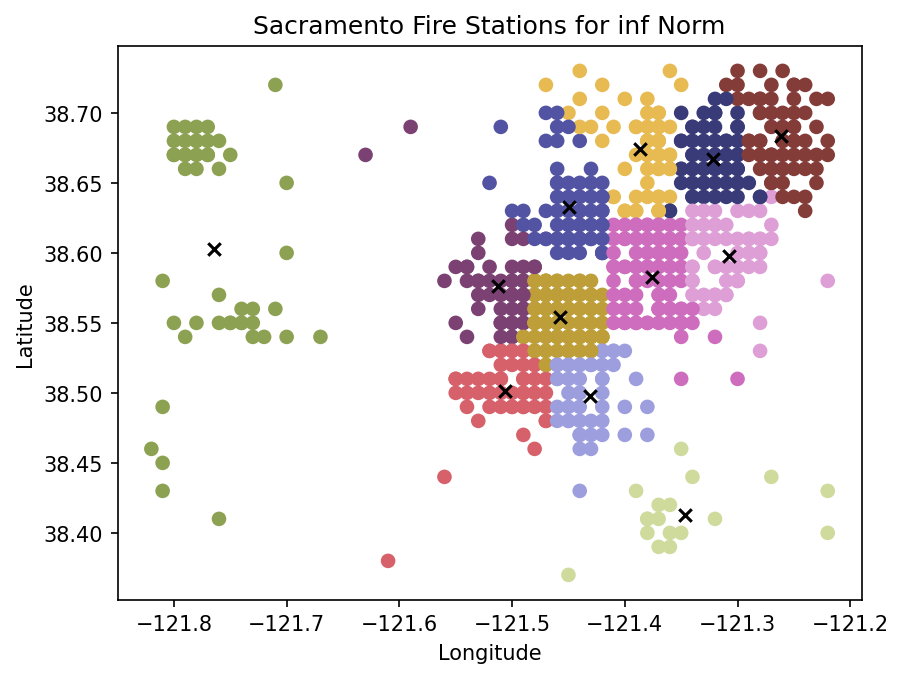

In [73]:
# load data for fire stations
sacramento = np.load("/mnt/c/Users/dalli/source/acme_senior/vl3labs/KMeans/sacramento.npy")[:,6:]
stations = 12
sample_size = 20
orders = 3
distances = np.zeros((orders, sample_size))
index = 0

# use Kmeans to find the best locations
for i in range(1, orders + 1):
    if i == 3:
        i = np.inf
    for s in range(sample_size):
        SAC = KMeans(n_clusters = stations, p=i)
        target = SAC.fit_predict(sacramento)
        if s == 0:
            SAC.plot(sacramento, target, flip=True, title=f"Sacramento Fire Stations for {i} Norm", xlabel="Longitude", ylabel="Latitude")
        distances[index, s] = SAC.max_dist
    index += 1


In [74]:
# find the best norm
best_norm = np.argmin(np.mean(distances, axis=1)) + 1
if best_norm == 3:
    best_norm = "infinity"
print(f"Between the 1, 2, and infinity norm sampled {sample_size} times each, the best norm is the {best_norm} norm.")

Between the 1, 2, and infinity norm sampled 20 times each, the best norm is the 2 norm.


Between the 1, 2, and infinity norm sampled 20 times each, the best norm is the 2 norm.

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

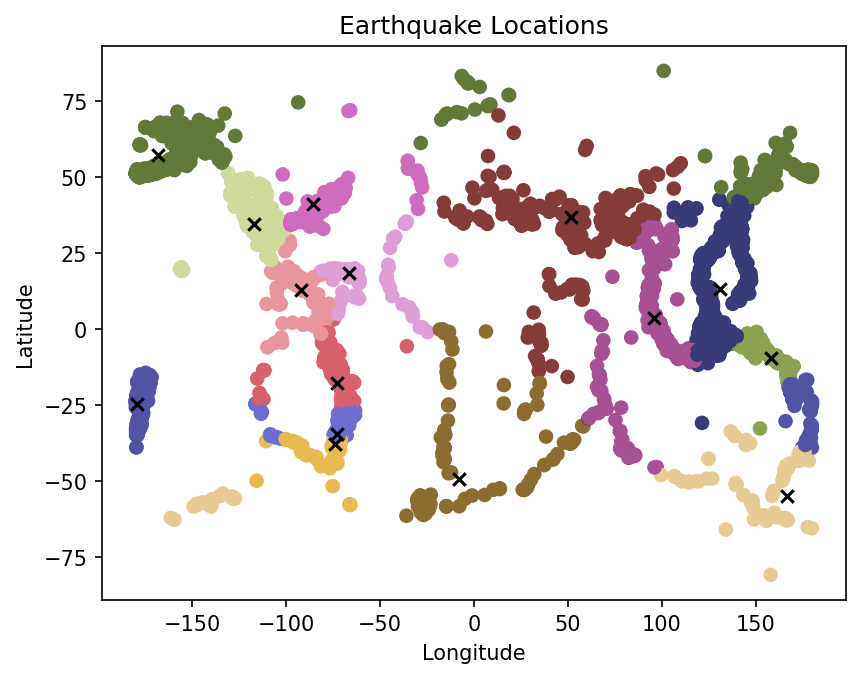

In [76]:
# load data for earthquakes and convert to euclidean coordinates
earthquakes = np.load("/mnt/c/Users/dalli/source/acme_senior/vl3labs/KMeans/earthquake_coordinates.npy")
theta = np.deg2rad(earthquakes[:,0])
phi = np.deg2rad(90 - earthquakes[:,1])
x = np.sin(phi)*np.cos(theta)
y = np.sin(phi)*np.sin(theta)
z = np.cos(phi)
point = np.array([x,y,z])

# use Kmeans to find the best locations
EARTH = KMeans(n_clusters = 15, p = 1, normalize=True)
target = EARTH.fit_predict(point.T)

# convert the centers back to longitude and latitude
theta = np.arctan2(EARTH.centers[:,1], EARTH.centers[:,0])
phi = np.arccos(EARTH.centers[:,2])
longitude = (180 / np.pi) * theta
latitude = 90 - (180 * phi) / np.pi
EARTH.centers = np.array([longitude, latitude]).T

# plot the results
EARTH.plot(earthquakes, target, title="Earthquake Locations", xlabel="Longitude", ylabel="Latitude")

## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [79]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    # reshape the image so that each row represents a single pixel
    im_pixels = im.reshape(-1, 3)

    # choose s pixels to train the k-means model on
    training_pixels = im_pixels[np.random.choice(im_pixels.shape[0], n_samples, replace=False)]

    # fit the k-means model
    QUANT = KM(n_clusters = n_clusters)
    QUANT.fit(training_pixels)

    # Make a copy of the original picture where each pixel has the same color as its cluster center
    im_copy = im_pixels.copy()
    for i in range(im_copy.shape[0]):
        im_copy[i] = QUANT.cluster_centers_[QUANT.predict([im_copy[i]])]
    
    return im_copy.reshape(im.shape)   
    

/home/dps2000/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


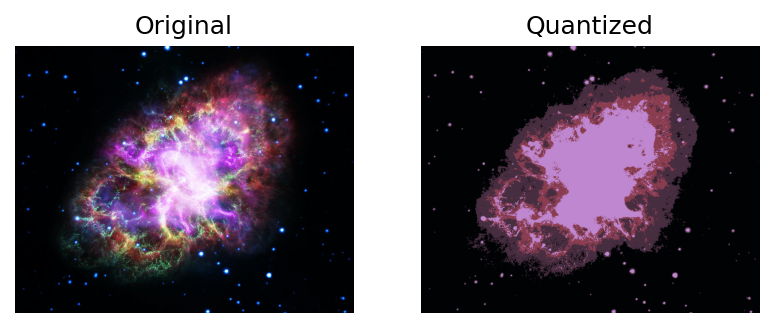

In [80]:
nasa_image = plt.imread("/mnt/c/Users/dalli/source/acme_senior/vl3labs/KMeans/nasa/nasa/crab_nebula.jpg")

# show the original and the quantized image
plt.subplot(121)
plt.imshow(nasa_image)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(quantize_image(nasa_image))
plt.title("Quantized")
plt.axis('off')
plt.show()